# **Hate Speech Detection using ML classifiers**

# **ML classifiers vs Neural Network**

Insatlling necesaary libraries

In [49]:
!pip install scikit-optimize

In [50]:
!pip install scikit-learn
!pip install seaborn
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install scikit-optimize

In [51]:
pip install pandas numpy seaborn matplotlib pycaret

Cloning the source git

In [52]:
!git clone https://github.com/danushkhanna/iNeuron.ai-Phishing-Domain-Detection.git

fatal: destination path 'iNeuron.ai-Phishing-Domain-Detection' already exists and is not an empty directory.


Importing the required libraries

In [53]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

In [55]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [56]:
import pickle
from pycaret.classification import *

# **Hate Speech Detection dataset**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CONAN_Dataset - CONAN_English_RewardTest.csv')
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CONAN_Dataset - CONAN_English_RewardTrain.csv')
df2

,speech,class
0,The Arabs want to impose their religion and to...,0
1,The Arabs are all terrorists and they want to ...,0
2,It's a shame that there is no longer the cruci...,0
3,"Then we must castrate even Italians who rape, ...",1
4,The Arabs do not want to impose their religion...,1
...,...,...
1495,What is your problem with Muslims? They are pe...,1
1496,Did you know that the only terrorist attacks i...,1
1497,The Arabs want to impose their religion and to...,0
1498,A real Islamic invasion is taking place.,0


In [59]:
df2.head()

,speech,class
0,The Arabs want to impose their religion and to...,0
1,The Arabs are all terrorists and they want to ...,0
2,It's a shame that there is no longer the cruci...,0
3,"Then we must castrate even Italians who rape, ...",1
4,The Arabs do not want to impose their religion...,1


In [60]:
print(df2.describe())

             class
count  1500.000000
mean      0.600667
std       0.489925
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [61]:
#SETTING UP THE DATA FOR MODELLING

setup(data=df2, target='class')

,Description,Value
0,Session id,4889
1,Target,class
2,Target type,Binary
3,Original data shape,"(1500, 2)"
4,Transformed data shape,"(1500, 2)"
5,Transformed train set shape,"(1050, 2)"
6,Transformed test set shape,"(450, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


**Preparing Data for Modeling-**

In [62]:
X_train= df2['speech']
y_train= df2['class']

In [63]:
X_test= df1['speech']
y_test= df1['class']

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train is a pandas Series containing text data
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
X_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test = tfidf_vectorizer.transform(X_test)

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1500, 2246)
(1500,)
(301, 2246)
(301,)


In [66]:
# Define a dictionary to store the results
results = {}

## **Evaluating Various ML Models-**

**1.Logistic regression-**

In [67]:
%%time
start_time = time.time()
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Logistic Regression'][0])
print("Precision:", results['Logistic Regression'][1])
print("Recall:", results['Logistic Regression'][2])
print("F1-score:", results['Logistic Regression'][3])
print("Training Time:", results['Logistic Regression'][4])

Accuracy: 0.8803986710963455
Precision: 0.9035473154002786
Recall: 0.8803986710963455
F1-score: 0.8787125621362376
Training Time: 0.032453060150146484
CPU times: user 44.9 ms, sys: 831 µs, total: 45.8 ms
Wall time: 56.7 ms


**2. K-Nearest Neighbors (KNN)**

In [68]:
%%time
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['K-Nearest Neighbors (KNN)'][0])
print("Precision:", results['K-Nearest Neighbors (KNN)'][1])
print("Recall:", results['K-Nearest Neighbors (KNN)'][2])
print("F1-score:", results['K-Nearest Neighbors (KNN)'][3])
print("Training Time:", results['K-Nearest Neighbors (KNN)'][4])

Accuracy: 0.9036544850498339
Precision: 0.911707712931703
Recall: 0.9036544850498339
F1-score: 0.9032058745435307
Training Time: 0.043700218200683594
CPU times: user 59.1 ms, sys: 797 µs, total: 59.9 ms
Wall time: 60.4 ms


**3. Gaussian Naive Bayes (GaussianNB)**

In [69]:
gnb = GaussianNB()

# Train the classifier
start_time = time.time()
gnb.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense array
training_time = time.time() - start_time

# Predict on the test set
y_pred = gnb.predict(X_test.toarray())  # Convert sparse matrix to dense array

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 0.920265780730897
Precision: 0.9312636040783594
Recall: 0.920265780730897
F1-score: 0.9197771351025491
Training Time: 0.1601412296295166


**4. Decision Trees**

In [70]:
%%time
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Decision Trees'][0])
print("Precision:", results['Decision Trees'][1])
print("Recall:", results['Decision Trees'][2])
print("F1-score:", results['Decision Trees'][3])
print("Training Time:", results['Decision Trees'][4])

Accuracy: 0.8604651162790697
Precision: 0.8909883720930233
Recall: 0.8604651162790697
F1-score: 0.8577629225120046
Training Time: 0.0764153003692627
CPU times: user 76.8 ms, sys: 0 ns, total: 76.8 ms
Wall time: 94.4 ms


**5. Random Forest**

In [71]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Random Forest'][0])
print("Precision:", results['Random Forest'][1])
print("Recall:", results['Random Forest'][2])
print("F1-score:", results['Random Forest'][3])
print("Training Time:", results['Random Forest'][4])

Accuracy: 0.8538205980066446
Precision: 0.8869746891803952
Recall: 0.8538205980066446
F1-score: 0.8507043704447707
Training Time: 0.6607911586761475
CPU times: user 537 ms, sys: 0 ns, total: 537 ms
Wall time: 672 ms


**6. Extra Trees**

In [72]:
%%time
start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Extra Trees'][0])
print("Precision:", results['Extra Trees'][1])
print("Recall:", results['Extra Trees'][2])
print("F1-score:", results['Extra Trees'][3])
print("Training Time:", results['Extra Trees'][4])

Accuracy: 0.8538205980066446
Precision: 0.8869746891803952
Recall: 0.8538205980066446
F1-score: 0.8507043704447707
Training Time: 0.49945569038391113
CPU times: user 493 ms, sys: 0 ns, total: 493 ms
Wall time: 517 ms


**7. Support Vector Machines (SVM)**

In [73]:
%%time
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Support Vector Machines'][0])
print("Precision:", results['Support Vector Machines'][1])
print("Recall:", results['Support Vector Machines'][2])
print("F1-score:", results['Support Vector Machines'][3])
print("Training Time:", results['Support Vector Machines'][4])

Accuracy: 0.8538205980066446
Precision: 0.8869746891803952
Recall: 0.8538205980066446
F1-score: 0.8507043704447707
Training Time: 0.2669563293457031
CPU times: user 250 ms, sys: 0 ns, total: 250 ms
Wall time: 289 ms


**8. Neural Network MLP (Multi-layer Perceptron)**

In [74]:
%%time
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Neural Networks (Multi-layer Perceptron)'][0])
print("Precision:", results['Neural Networks (Multi-layer Perceptron)'][1])
print("Recall:", results['Neural Networks (Multi-layer Perceptron)'][2])
print("F1-score:", results['Neural Networks (Multi-layer Perceptron)'][3])
print("Training Time:", results['Neural Networks (Multi-layer Perceptron)'][4])

Accuracy: 0.893687707641196
Precision: 0.9123799788251615
Recall: 0.893687707641196
F1-score: 0.8925112039149584
Training Time: 5.046090841293335
CPU times: user 3.86 s, sys: 3.01 s, total: 6.86 s
Wall time: 5.06 s


**9. AdaBoost**

In [75]:
%%time
start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['AdaBoost'][0])
print("Precision:", results['AdaBoost'][1])
print("Recall:", results['AdaBoost'][2])
print("F1-score:", results['AdaBoost'][3])
print("Training Time:", results['AdaBoost'][4])

Accuracy: 0.8704318936877077
Precision: 0.8971681695934187
Recall: 0.8704318936877077
F1-score: 0.8682781656175076
Training Time: 0.6176362037658691
CPU times: user 514 ms, sys: 29.5 ms, total: 544 ms
Wall time: 632 ms


**10. XGBoost**

In [76]:
%%time
start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['XGBoost'][0])
print("Precision:", results['XGBoost'][1])
print("Recall:", results['XGBoost'][2])
print("F1-score:", results['XGBoost'][3])
print("Training Time:", results['XGBoost'][4])

Accuracy: 0.8704318936877077
Precision: 0.8971681695934187
Recall: 0.8704318936877077
F1-score: 0.8682781656175076
Training Time: 6.069357872009277
CPU times: user 4.13 s, sys: 0 ns, total: 4.13 s
Wall time: 6.09 s


**11. Light Gradient Boosting Machine (LGBM)**

In [77]:
import lightgbm as lgbm

# Initialize LightGBM classifier
lgbm_classifier = lgbm.LGBMClassifier()

# Train the classifier
start_time = time.time()
lgbm_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred = lgbm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


[LightGBM] [Info] Number of positive: 901, number of negative: 599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.600667 -> initscore=0.408244
[LightGBM] [Info] Start training from score 0.408244
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.867109634551495
Precision: 0.8950865535932856
Recall: 0.867109634551495
F1-score: 0.8647824121660026
Training Time: 0.38364100456237793


**12. CatBoost**

In [78]:
%%time
start_time = time.time()
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['CatBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['CatBoost'][0])
print("Precision:", results['CatBoost'][1])
print("Recall:", results['CatBoost'][2])
print("F1-score:", results['CatBoost'][3])
print("Training Time:", results['CatBoost'][4])

Learning rate set to 0.01225
0:	learn: 0.6810806	total: 62.6ms	remaining: 1m 2s
1:	learn: 0.6701537	total: 113ms	remaining: 56.2s
2:	learn: 0.6571809	total: 203ms	remaining: 1m 7s
3:	learn: 0.6463226	total: 286ms	remaining: 1m 11s
4:	learn: 0.6324722	total: 338ms	remaining: 1m 7s
5:	learn: 0.6234640	total: 394ms	remaining: 1m 5s
6:	learn: 0.6152077	total: 463ms	remaining: 1m 5s
7:	learn: 0.6047809	total: 503ms	remaining: 1m 2s
8:	learn: 0.5921031	total: 544ms	remaining: 59.9s
9:	learn: 0.5843081	total: 587ms	remaining: 58.1s
10:	learn: 0.5726262	total: 621ms	remaining: 55.8s
11:	learn: 0.5643372	total: 682ms	remaining: 56.2s
12:	learn: 0.5577445	total: 773ms	remaining: 58.7s
13:	learn: 0.5492630	total: 831ms	remaining: 58.5s
14:	learn: 0.5406030	total: 918ms	remaining: 1m
15:	learn: 0.5334646	total: 979ms	remaining: 1m
16:	learn: 0.5260592	total: 1.06s	remaining: 1m 1s
17:	learn: 0.5160168	total: 1.15s	remaining: 1m 2s
18:	learn: 0.5055446	total: 1.24s	remaining: 1m 4s
19:	learn: 0.499

**13. Stochastic Gradient Descent (SGD)**

In [79]:
%%time
start_time = time.time()
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Stochastic Gradient Descent (SGD)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]
print("Accuracy:", results['Stochastic Gradient Descent (SGD)'][0])
print("Precision:", results['Stochastic Gradient Descent (SGD)'][1])
print("Recall:", results['Stochastic Gradient Descent (SGD)'][2])
print("F1-score:", results['Stochastic Gradient Descent (SGD)'][3])
print("Training Time:", results['Stochastic Gradient Descent (SGD)'][4])

Accuracy: 0.8803986710963455
Precision: 0.9035473154002786
Recall: 0.8803986710963455
F1-score: 0.8787125621362376
Training Time: 0.008233785629272461
CPU times: user 23.5 ms, sys: 0 ns, total: 23.5 ms
Wall time: 27.8 ms


**14. Linear Discriminant Analysis (LDA)**

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()

# Train the classifier
start_time = time.time()
lda.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense array
training_time = time.time() - start_time

# Predict on the test set
y_pred = lda.predict(X_test.toarray())  # Convert sparse matrix to dense array

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 0.9269102990033222
Precision: 0.9331301676117203
Recall: 0.9269102990033222
F1-score: 0.9266626525277157
Training Time: 5.1834142208099365


**15. Quadratic Discriminant Analysis (QDA)**

In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()

# Train the classifier
start_time = time.time()
qda.fit(X_train.toarray(), y_train)  # Convert sparse matrix to dense array
training_time = time.time() - start_time

# Predict on the test set
y_pred = qda.predict(X_test.toarray())  # Convert sparse matrix to dense array

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Training Time: 2.2483327388763428


## Neural Networks 🧠

creating NN layers and compiling with loss, metrics, optimizer configs

Training NN

In [82]:
import time
import tensorflow as tf
import numpy as np

# Convert SparseTensor to dense numpy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')

start_time = time.time()

history = model.fit(X_train_dense,
                     y_train,
                     epochs=500,
                     verbose=1,
                     batch_size=32,
                     validation_data=(X_test_dense, y_test))

end_time = time.time()
training_time = end_time - start_time


Epoch 1/500
47/47 [==============================] - 1s 9ms/step - loss: 0.5482 - binary_accuracy: 0.7153 - val_loss: 0.5555 - val_binary_accuracy: 0.5648
Epoch 2/500
47/47 [==============================] - 0s 6ms/step - loss: 0.1111 - binary_accuracy: 0.9840 - val_loss: 0.3417 - val_binary_accuracy: 0.8671
Epoch 3/500
47/47 [==============================] - 0s 6ms/step - loss: 0.0148 - binary_accuracy: 0.9967 - val_loss: 0.3893 - val_binary_accuracy: 0.8738
Epoch 4/500
47/47 [==============================] - 0s 5ms/step - loss: 0.0047 - binary_accuracy: 1.0000 - val_loss: 0.3990 - val_binary_accuracy: 0.8738
Epoch 5/500
47/47 [==============================] - 0s 5ms/step - loss: 0.0024 - binary_accuracy: 1.0000 - val_loss: 0.4449 - val_binary_accuracy: 0.8738
Epoch 6/500
47/47 [==============================] - 0s 5ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.4660 - val_binary_accuracy: 0.8738
Epoch 7/500
47/47 [==============================] - 0s 5ms/step - los

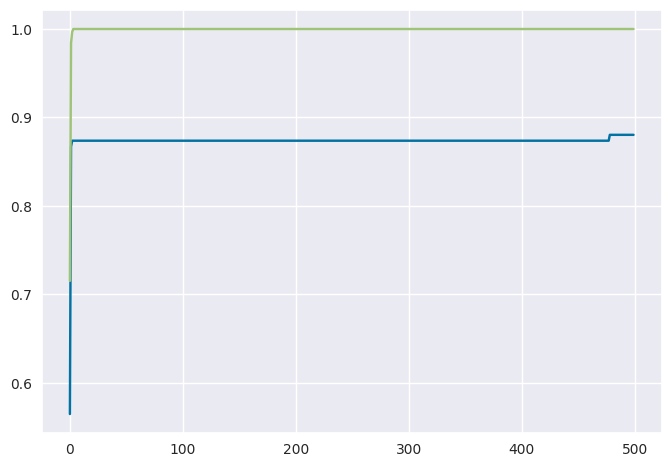

In [83]:
plt.plot(history.history['val_binary_accuracy'])
plt.plot(history.history['binary_accuracy'])

In [84]:
y_pred = np.round(model.predict(X_test)).flatten()

results['Neural Network'] = [accuracy_score(y_test, y_pred),
                             precision_score(y_test, y_pred, average='weighted'),
                             recall_score(y_test, y_pred, average='weighted'),
                             f1_score(y_test, y_pred, average='weighted'),
                             training_time]
print("Accuracy:", results['Neural Network'][0])
print("Precision:", results['Neural Network'][1])
print("Recall:", results['Neural Network'][2])
print("F1-score:", results['Neural Network'][3])
print("Training Time:", results['Neural Network'][4])

10/10 [==============================] - 0s 2ms/step
Accuracy: 0.8803986710963455
Precision: 0.9035473154002786
Recall: 0.8803986710963455
F1-score: 0.8787125621362376
Training Time: 156.9871153831482


## Model Result Comparison and Analysis 📈

In [85]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

df_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.880399,0.903547,0.880399,0.878713,0.032453
K-Nearest Neighbors (KNN),0.903654,0.911708,0.903654,0.903206,0.043700
Decision Trees,0.860465,0.890988,0.860465,0.857763,0.076415
Random Forest,0.853821,0.886975,0.853821,0.850704,0.660791
Extra Trees,0.853821,0.886975,0.853821,0.850704,0.499456
Support Vector Machines,0.853821,0.886975,0.853821,0.850704,0.266956
Neural Networks (Multi-layer Perceptron),0.893688,0.912380,0.893688,0.892511,5.046091
AdaBoost,0.870432,0.897168,0.870432,0.868278,0.617636
XGBoost,0.870432,0.897168,0.870432,0.868278,6.069358
CatBoost,0.883721,0.905720,0.883721,0.882174,60.479728


## Analysing Best Performing Model - Linear Discriminant Analysis (LDA)

In [86]:
%%time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Convert SparseTensor to dense numpy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()

# Train the classifier
start_time = time.time()
lda.fit(X_train_dense, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred = lda.predict(X_test_dense)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Training Time:", training_time)


Accuracy: 0.9269102990033222
Precision: 0.9331301676117203
Recall: 0.9269102990033222
F1-score: 0.9266626525277157
Training Time: 3.5697526931762695
CPU times: user 6.2 s, sys: 590 ms, total: 6.79 s
Wall time: 3.64 s


In [87]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       151
           1       0.88      0.99      0.93       150

    accuracy                           0.93       301
   macro avg       0.93      0.93      0.93       301
weighted avg       0.93      0.93      0.93       301



## Confusion Matrix-

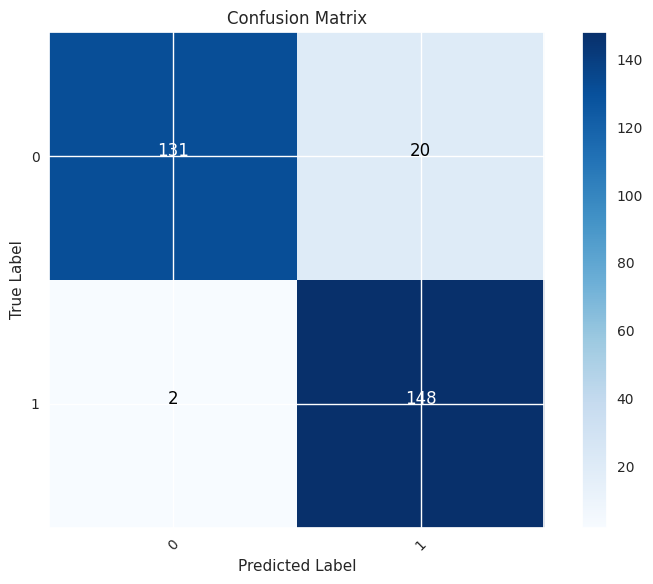

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
classes = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [89]:
import numpy as np

# Iterate over each classifier
classifiers = {
    'Logistic Regression': logistic,
    'K-Nearest Neighbors (KNN)': knn,
    'Gaussian Naive Bayes': gnb,
    'Decision Trees': dt,
    'Random Forest': rf,
    'Extra Trees': et,
    'Support Vector Machines': svm,
    'Neural Networks (Multi-layer Perceptron)': mlp,
    'AdaBoost': ada,
    'XGBoost': xgboost,
    'LightGBM': lgbm,
    'CatBoost': cat,
    'Stochastic Gradient Descent (SGD)': sgd,
    'Linear Discriminant Analysis': lda,
    'Quadratic Discriminant Analysis': qda,
    'Neural Network': model
}

for name, classifier in classifiers.items():
    try:
        # Predict using the classifier
        if name == 'Neural Network':  # For neural network model
            # Convert SparseTensor to dense numpy arrays
            X_test_dense = X_test.toarray()
            y_pred = np.round(classifier.predict(X_test_dense)).flatten()
        elif name == 'LightGBM':
            # Predict using LightGBM model directly
            y_pred = classifier.predict(X_test)
        else:
            # Convert TF-IDF transformed sparse matrices to dense numpy arrays
            X_test_dense = X_test.toarray()
            y_pred = classifier.predict(X_test_dense)

        # Get indices of rows predicted as hate speech
        hate_speech_indices = np.where(y_pred == 1)[0]

        # Get the rows of speeches predicted as hate speech
        hate_speech_rows = df1.iloc[hate_speech_indices]

        # Display the hate speech rows
        print(f"Hate speech detected by {name} classifier:")
        print(hate_speech_rows)

        # Save the hate speech rows to a CSV file
        hate_speech_rows.to_csv(f"/content/drive/MyDrive/Colab Notebooks/{name}_hate_speech.csv", index=False)
    except AttributeError:
        print(f"AttributeError: Cannot predict using {name}.")


Hate speech detected by Logistic Regression classifier:
                                                speech  class
0    In comparison to cases of violence in Italy ma...      1
2       Unfortunately, many Italians commit rapes too.      1
3    I don't want to have anything to do with the I...      0
4    The statistics state that the rapists are almo...      1
5    Violence against women is a problem that does ...      1
..                                                 ...    ...
292  Are you worried that Italians may have competi...      1
293  I do not understand why you perceive this risk...      1
294  I am an Italian woman, and I feel neither a pr...      1
295  The imposition of the burqa regards the most e...      1
298  The respect for each other born like this, acc...      1

[186 rows x 2 columns]
Hate speech detected by K-Nearest Neighbors (KNN) classifier:
                                                speech  class
0    In comparison to cases of violence in Italy ma.